In [25]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import plotly.graph_objects as go
from mlxtend.frequent_patterns import fpgrowth, apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [26]:
df = pd.read_csv('BRCA.csv')
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [27]:
df.shape

(341, 16)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [29]:
df = df.dropna(subset=['Patient_Status'], axis=0)
df.Gender.value_counts()

FEMALE    317
MALE        4
Name: Gender, dtype: int64

In [30]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,321.000000,321.000000,321.000000,321.000000,321.000000
mean,58.875389,-0.026479,0.954563,-0.093279,0.008813
std,12.929982,0.546689,0.909635,0.587981,0.622491
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.361650,0.368840,-0.531360,-0.378070
50%,58.000000,0.005649,1.000300,-0.177200,0.040511
75%,68.000000,0.336530,1.633200,0.275630,0.428860
max,90.000000,1.593600,3.402200,2.193400,1.629900


Alive    255
Dead      66
Name: Patient_Status, dtype: int64


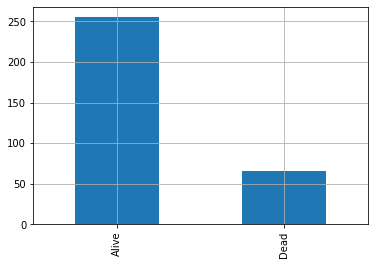

In [31]:
target = 'Patient_Status'
print(df[target].value_counts())
df[target].value_counts().plot(kind='bar')
plt.grid()
plt.show()

In [32]:
features_num = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']
df[features_num].describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,321.000000,321.000000,321.000000,321.000000,321.000000
mean,58.875389,-0.026479,0.954563,-0.093279,0.008813
std,12.929982,0.546689,0.909635,0.587981,0.622491
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.361650,0.368840,-0.531360,-0.378070
50%,58.000000,0.005649,1.000300,-0.177200,0.040511
75%,68.000000,0.336530,1.633200,0.275630,0.428860
max,90.000000,1.593600,3.402200,2.193400,1.629900


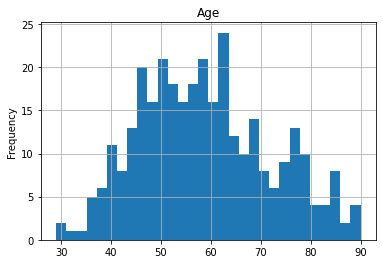

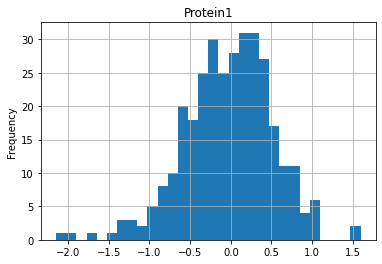

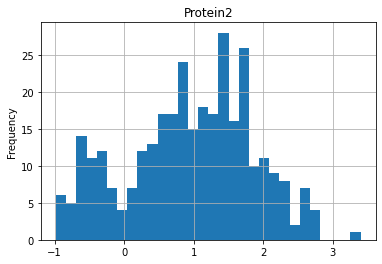

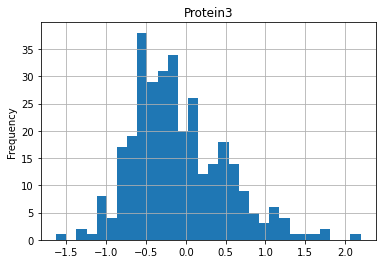

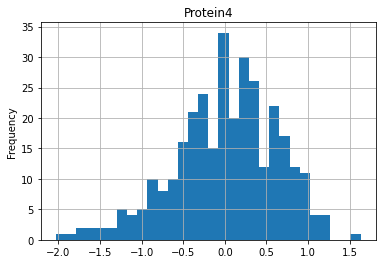

In [33]:
for f in features_num:
    df[f].plot(kind='hist', bins=30)
    plt.title(f)
    plt.grid()
    plt.show()

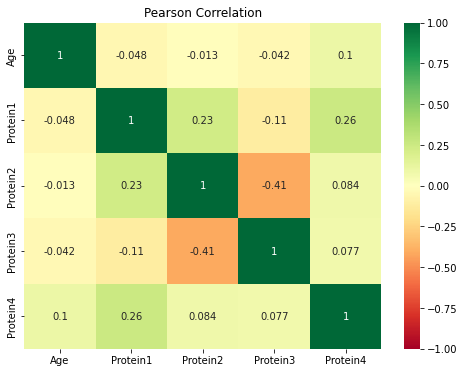

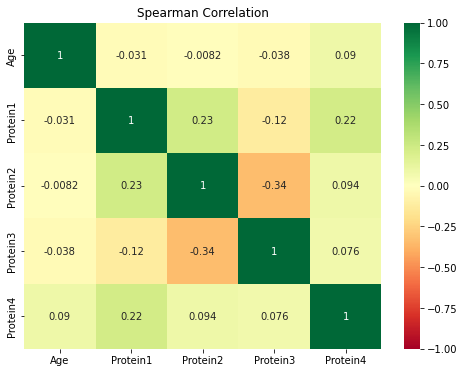

In [34]:
corr_pearson = df[features_num].corr(method='pearson')
corr_spearman = df[features_num].corr(method='spearman')

fig = plt.figure(figsize = (8,6))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

fig = plt.figure(figsize = (8,6))
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

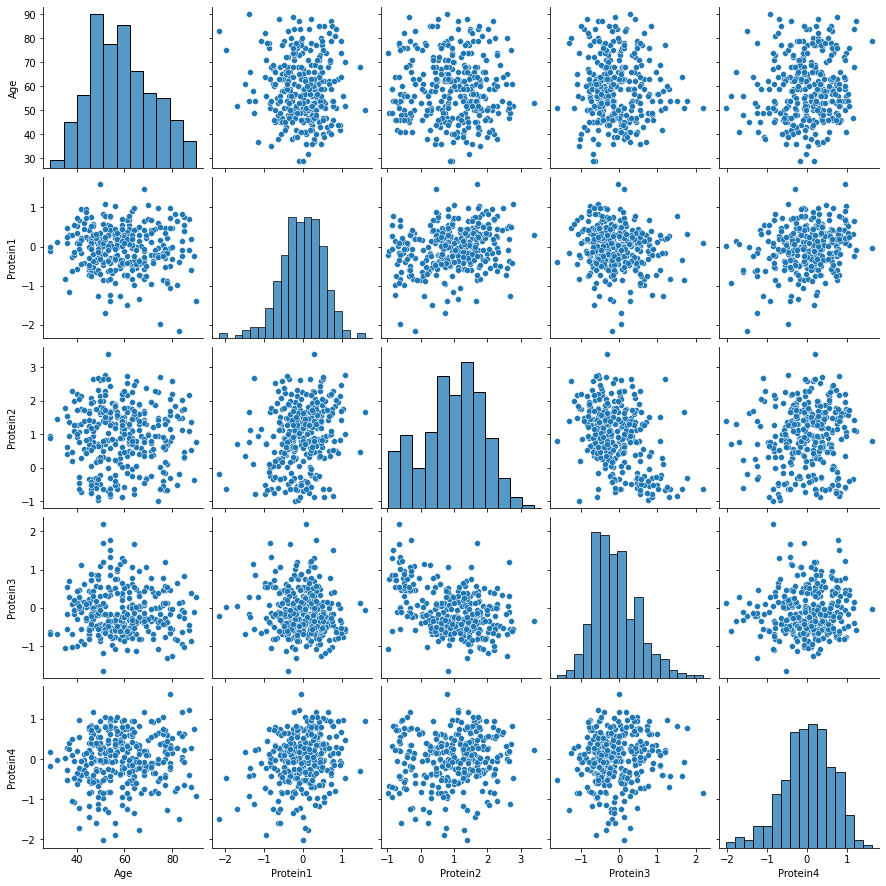

In [35]:
sns.pairplot(df[features_num])
plt.show()

In [36]:
cols = df.columns
cols = cols.str.replace('catg_','')
cols = cols.str.replace('_',' ')
df.columns = cols
df.head(5)

,Patient ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour Stage,Histology,ER status,PR status,HER2 status,Surgery type,Date of Surgery,Date of Last Visit,Patient Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [37]:
static_data = df.drop('Age', axis= 1)
static_data = static_data.groupby('Protein4').sum().reset_index()

for col in static_data.columns[1:]:
    static_data[col] = static_data[col].apply(lambda x: 1 if x>0 else 0)
    
static_data.head(5)

,Protein4,Protein1,Protein2,Protein3
0,-2.0255,1,1,1
1,-1.8993,0,1,0
2,-1.7684,1,1,0
3,-1.7127,1,1,1
4,-1.6028,0,0,0


In [38]:
patterns = fpgrowth(static_data.iloc[:,1:], min_support= 0.00002, use_colnames= True)

frequent_sets = patterns.sort_values('support', ascending= False)[:10]
frequent_sets.support = frequent_sets.support * len(static_data)
frequent_sets

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,263.0,(Protein2)
1,163.0,(Protein1)
3,140.0,"(Protein1, Protein2)"
2,125.0,(Protein3)
4,81.0,"(Protein3, Protein2)"
5,62.0,"(Protein1, Protein3)"
6,45.0,"(Protein1, Protein3, Protein2)"


In [39]:
rules = association_rules(patterns, metric= 'confidence', min_threshold= 0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Protein1),(Protein2),0.509375,0.821875,0.437500,0.858896,1.045044,0.018857,1.262364
1,(Protein2),(Protein1),0.821875,0.509375,0.437500,0.532319,1.045044,0.018857,1.049060
2,(Protein3),(Protein2),0.390625,0.821875,0.253125,0.648000,0.788441,-0.067920,0.506037
3,(Protein2),(Protein3),0.821875,0.390625,0.253125,0.307985,0.788441,-0.067920,0.880580
4,(Protein1),(Protein3),0.509375,0.390625,0.193750,0.380368,0.973742,-0.005225,0.983447
5,(Protein3),(Protein1),0.390625,0.509375,0.193750,0.496000,0.973742,-0.005225,0.973462
6,"(Protein1, Protein3)",(Protein2),0.193750,0.821875,0.140625,0.725806,0.883111,-0.018613,0.649632
7,"(Protein1, Protein2)",(Protein3),0.437500,0.390625,0.140625,0.321429,0.822857,-0.030273,0.898026
8,"(Protein3, Protein2)",(Protein1),0.253125,0.509375,0.140625,0.555556,1.090661,0.011689,1.103906
9,(Protein1),"(Protein3, Protein2)",0.509375,0.253125,0.140625,0.276074,1.090661,0.011689,1.031700
